# Brown Marmorated Stink Bug (BMSB) Risk Analysis in Minnesota: Exploratory Data Analysis

Contributors: Mattie Gisselbeck and Luke Zaruba

Description: This notebook conducts an exploratory data analysis to gain insights into BMSB habitat characteristics. Random Forest algorithm was used to analyze the relationship between BMSB presence and independent variables (population, DEM (range, mean, median, and standard deviation), mean maximum temperature, mean minimum temperature, mean precipitation, and NLCD land cover classes (agricultural, urban, and natural)) and as a regression analysis to predict BMSB presence (point count) in Minnesota considering the independent variables.

Last Updated: March 26, 2024

### 0. Import Packages and Modules

In [1]:
# Import Packages
import os
import arcgis
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### 1. Split Dataset into Independent Variables (X) and Dependent Variable (y)

In [9]:
# Read Model Variables Aggregated by City
df = pd.read_csv("/Users/mattiegisselbeck/Documents/GitHub/bmsb-risk-analysis-minnesota/data/model/CityTerritory.csv")

# Extract Columns
rf_df = df[["FEATURE_NA","COUNTY_NAM","POPULATION","DEM_RANGE","DEM_MEAN","DEM_STD","DEM_MEDIAN","WX_MAX_TMP","WX_MIN_TMP","WX_PRECIP","BMSB_Point_Count","NCLD_CLASS_1","NLCD_CLASS_2","NLCD_CLASS_3"]]
#variables_df.head()

In [10]:
# Split Dataset into Independent Variables (X) and Dependent Variable (y)
X = rf_df.drop("FEATURE_NA", axis = 1).drop("COUNTY_NAM", axis = 1)
y = rf_df["BMSB_Point_Count"]

### 2. Split Dataset into Training and Testing Sets

In [11]:
# Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 3. Create Random Forest Model

In [12]:
random_forest_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)

### 4. Fit Random Forest Model to Training Set

In [13]:
_ = random_forest_model.fit(X_train, y_train)

### 5. Predict Dependent Variable (y) using Independent Variables (X) in Testing Set

In [14]:
y_test_predicted = random_forest_model.predict(X_test)

### 6. Calculate Mean Squared Error and Coefficient of Determination

In [15]:
mse = mean_squared_error(y_test, y_test_predicted)
print(f"Mean Squared Error: {mse:.2f}")

r2 = r2_score(y_test, y_test_predicted)
print(f"Coefficient of Determination: {r2:.2f}")

Mean Squared Error: 0.89
Coefficient of Determination: 0.96


___________________________

### 1. Display Model Attributes and Covariates 

In [117]:
# Display DataFrame
df.head()

# Display DataFrame Information
#df.info()

,ObjectID,City,Population,DEM: Range,DEM: Mean,DEM: Standard Deviation,DEM: Median,WX: Mean Maximum Temperature,WX: Mean Minimum Temperature,WX: Mean Precipitation,SHAPE,NLCD: Percent Urban,NLCD: Percent Agricultral,NLCD: Percent Natural,BMSB: Presence
0,1,Bluffton,208,84,1347.493968,21.954257,1353,69.002294,49.479673,0.000164,"{""rings"": [[[329659.49899999984, 5147112.93899...",0.100864,0.552591,0.346545,0
1,2,Sartell,17750,120,1047.734411,16.158058,1047,69.840329,50.023607,0.000492,"{""rings"": [[[401466.0499999998, 5050916.149], ...",0.626767,0.240772,0.132461,0
2,3,Cambridge,10541,85,949.380606,17.984951,955,70.462952,49.659673,0.000273,"{""rings"": [[[479383.5999999996, 5046640.25], [...",0.566136,0.177083,0.256781,1
3,4,Waseca,9306,56,1136.962191,12.658397,1135,72.184263,52.943936,0.000383,"{""rings"": [[[456193.8666000003, 4880132.7445],...",0.594486,0.116623,0.28889,0
4,5,La Crescent,5365,584,725.380685,128.775186,679,74.276315,58.962108,0.0,"{""rings"": [[[633758.4579999996, 4853600.790999...",0.509542,0.0488,0.441658,1


### 2. Describe Columns of Interest

In [118]:
# Describe Columns of Interest
columns = ['DEM: Range', 'DEM: Mean', 'DEM: Standard Deviation',
       'DEM: Median', 
       'WX: Mean Maximum Temperature', 'WX: Mean Minimum Temperature', 'WX: Mean Precipitation',
       'NLCD: Percent Urban',
       'NLCD: Percent Agricultral', 'NLCD: Percent Natural'
          ]

df[columns].describe()

,DEM: Range,DEM: Mean,DEM: Standard Deviation,DEM: Median,WX: Mean Maximum Temperature,WX: Mean Minimum Temperature,WX: Mean Precipitation,NLCD: Percent Urban,NLCD: Percent Agricultral,NLCD: Percent Natural
count,905.0,905.0,905.0,905.0,905.0,905.0,905.0,905.0,905.0,905.0
mean,114.331492,1127.550952,24.219416,1126.351381,71.078708,51.263645,0.000201,0.429935,0.312898,0.257167
std,120.290139,213.023821,30.231619,214.686946,3.826424,3.734719,0.000212,0.231932,0.227399,0.239421
min,2.0,688.944369,0.481641,659.0,56.646569,39.016999,0.0,0.031836,0.0,0.0
25%,39.0,960.649979,7.452829,961.0,69.002294,49.412634,0.0,0.230852,0.132702,0.069185
50%,70.0,1098.637451,13.625136,1099.0,71.817379,51.805901,0.000164,0.415328,0.284688,0.180556
75%,137.0,1275.775485,27.692556,1279.0,73.463934,54.144742,0.000328,0.596493,0.479582,0.381429
max,942.0,1827.998921,302.245532,1821.0,79.324885,60.390536,0.000777,1.0,0.927194,0.967755


### 3. Describe Columns of Interest by BMSB Presence

In [120]:
# Describe Columns of Interest by BMSB Presence
df[columns].groupby(df["BMSB: Presence"]).describe().T

BMSB: Presence                        0           1
DEM: Range            count       775.0       130.0
                      mean    98.269677  210.084615
                      std    110.301329  132.711206
                      min           2.0        14.0
                      25%          35.0       118.5
...                                 ...         ...
NLCD: Percent Natural min           0.0    0.007946
                      25%      0.063274    0.101847
                      50%      0.173959    0.221766
                      75%      0.388793    0.339252
                      max      0.967755    0.794646

[80 rows x 2 columns]

### 4. Plot Columns of Interest 

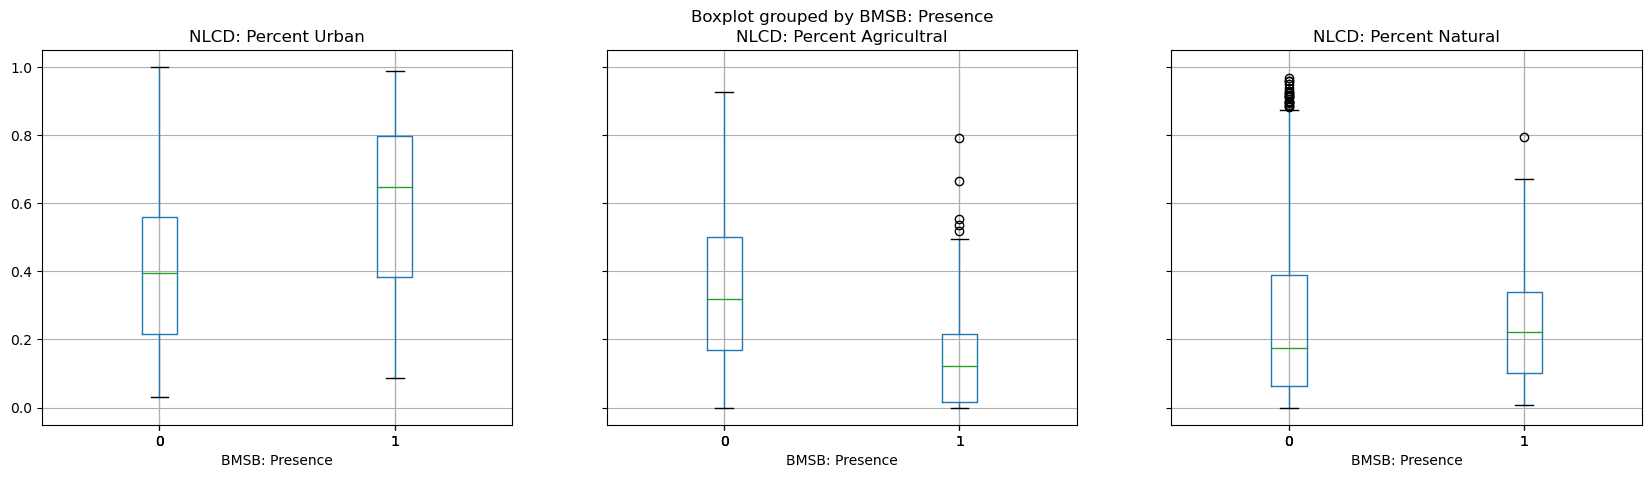

In [122]:
# Plot NLCD Types by BMSB Presence 
nlcd_boxplot = df.boxplot(column=["NLCD: Percent Urban", "NLCD: Percent Agricultral", "NLCD: Percent Natural"], by="BMSB: Presence", figsize=(20, 5), layout=(1, 3))
nlcd_boxplot;

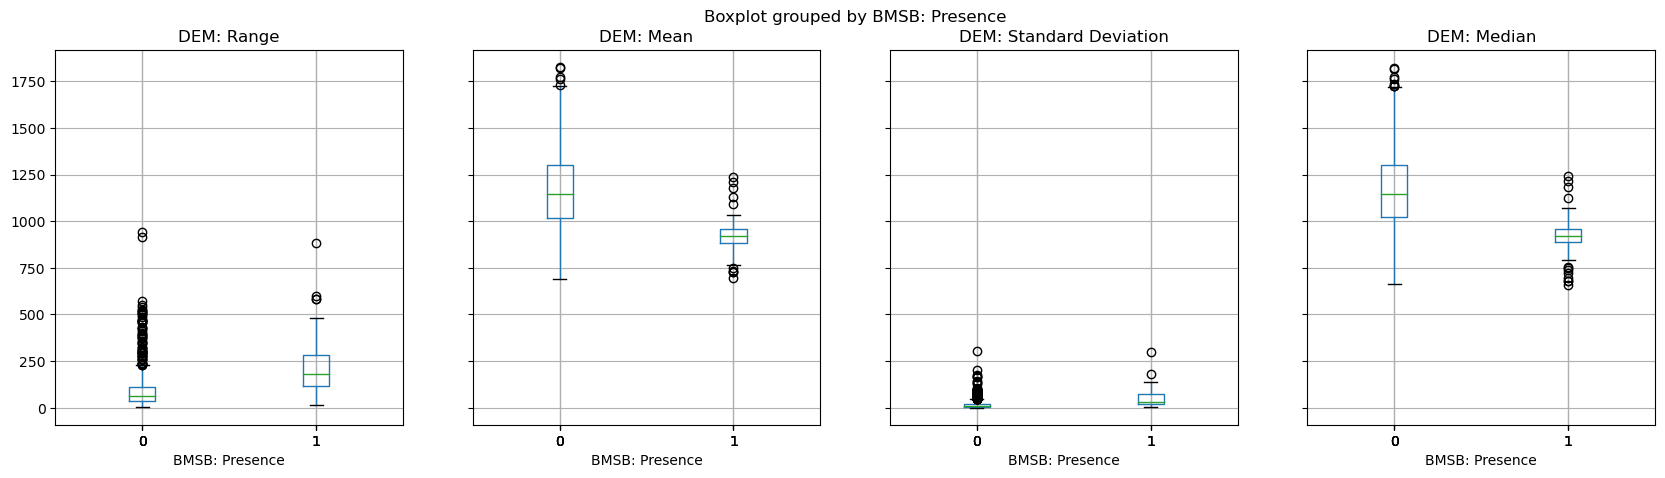

In [123]:
# Plot DEM Range, Mean, Standard Deviation, and Median by BMSB Presence
dem_boxplot = df.boxplot(column=["DEM: Range", "DEM: Mean", "DEM: Standard Deviation", "DEM: Median"], by="BMSB: Presence", figsize=(20, 5), layout=(1, 4))
dem_boxplot;

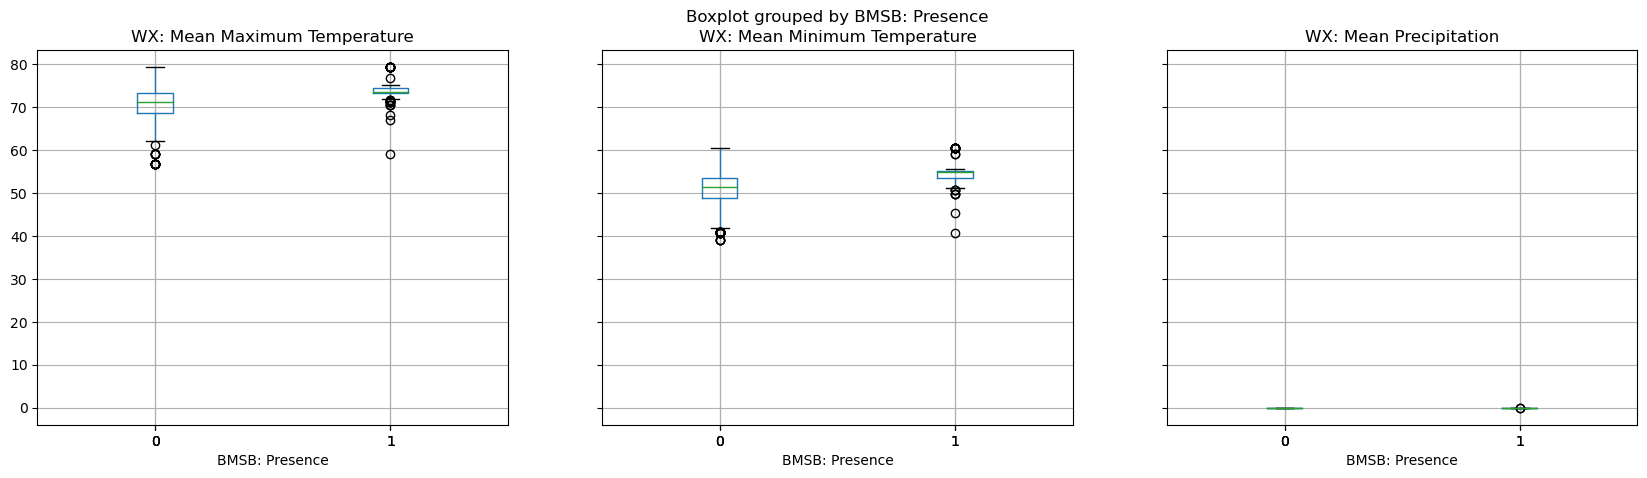

In [124]:
# Plot Mean Maximum Temperature, Mean Minimum Temperature, and Mean Precipitation by BMSB Presence
wx_box = df.boxplot(column=["WX: Mean Maximum Temperature", "WX: Mean Minimum Temperature", "WX: Mean Precipitation"], by="BMSB: Presence", figsize=(20, 5), layout=(1, 3))
wx_box;